<a href="https://colab.research.google.com/github/FILIPNFT/FILIPNFT/blob/main/NoteNM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai.vision.all import *

path = Path('/content/drive/MyDrive/dataset/')  # Proverite da li je ovo tačna putanja do vašeg dataset-a

# Učitavanje i transformacija podataka sa dodatkom normalizacije
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,  # 20% podataka za validacioni set
    seed=42,  # Seed za reproduktivnost
    item_tfms=Resize(128),  # Promena veličine slika na 128x128
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)],  # Dodajemo normalizaciju pored augmentacije
    bs=70  # Veličina batch-a
)

print(dls.vocab)  # Ispisivanje klasa u dataset-u

['do', 'fa', 'la', 'mi', 're', 'sol', 'ti']


SuggestedLRs(valley=0.001737800776027143)

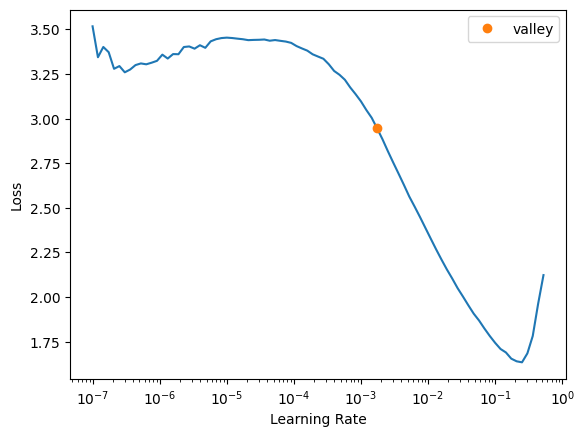

In [4]:
# Kreiranje modela
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Pronalaženje optimalne stope učenja
learn.lr_find()

In [5]:
learn.fine_tune(epochs=20, base_lr=0.001737800776027143)

epoch,train_loss,valid_loss,error_rate,time
0,3.270046,3.317256,0.772727,00:21


epoch,train_loss,valid_loss,error_rate,time
0,3.454043,3.038414,0.772727,00:13
1,3.316670,2.893915,0.818182,00:13
2,3.297837,2.736644,0.818182,00:13
3,3.298362,2.670443,0.818182,00:13
4,3.162763,2.510232,0.772727,00:17
5,3.075185,2.390632,0.772727,00:15
6,2.962587,2.247085,0.727273,00:15
7,2.851399,2.114942,0.681818,00:14
8,2.721773,2.002500,0.681818,00:19
9,2.590292,1.875354,0.681818,00:14


In [6]:
import torch
from torch import nn
from torch.optim import Adam

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 7)  # Imamo 7 izlaznih klasa (do, re, mi, fa, sol, la, ti)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MyCNN()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# Definisanje putanje do slike
image_path = '/content/drive/My Drive/test.jpeg'

img = PILImage.create(image_path)
pred,pred_idx,probs = learn.predict(img)

# Ispisivanje rezultata
print(f'Predviđena klasa: {pred}; Verovatnoća: {probs[pred_idx]:.2f}')


Predviđena klasa: do; Verovatnoća: 0.9673
